# $k$-NN Implementation  
* This $k$-Nearest Neighbors is broken down into 3 parts:

    1. Step 1: Calculate Euclidean Distance.
    2. Step 2: Get Nearest Neighbors.
    3. Step 3: Make Predictions.

* These steps will teach the fundamentals of implementing and applying the $k$-Nearest Neighbors algorithm for classification and regression predictive modeling problems.

__Step 1: Calculate Euclidean Distance__
* Rows of data are mostly made up of numbers and an easy way to calculate the distance between two rows or vectors of numbers is to draw a straight line. This makes sense in 2D or 3D and scales nicely to higher dimensions.
* We can calculate the straight line distance between two vectors using the Euclidean distance measure.
* With Euclidean distance, the smaller the value, the more similar two records will be. A value of 0 means that there is no difference between two records.
* Below is a function named euclidean_distance() that implements this in Python.

In [1]:
from math import sqrt
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    print(row1)
    print("000000000000000000000000000000000000000000000000000")
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 

__Step 2: Get Nearest Neighbors__
* Neighbors for a new piece of data in the dataset are the $k$ closest instances, as defined by our distance measure.
* To locate the neighbors for a new piece of data within a dataset we must first calculate the distance between each record in the dataset to the new piece of data. We can do this using our distance function prepared above.
* Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data. We can then select the top $k$ to return as the most similar neighbors.
* We can do this by keeping track of the distance for each record in the dataset as a tuple, sort the list of tuples by the distance (in descending order) and then retrieve the neighbors.
* Below is a function named get_neighbors() that implements this.

In [2]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

* You can see that the euclidean_distance() function developed in the previous step is used to calculate the distance between each train_row and the new test_row.
* The list of train_row and distance tuples is sorted where a custom key is used ensuring that the second item in the tuple (tup[1]) is used in the sorting operation.
* Finally, a list of the num_neighbors most similar neighbors to test_row is returned.

__Step 3: Make Predictions__
* The most similar neighbors collected from the training dataset can be used to make predictions.
* In the case of classification, we can return the most represented class among the neighbors.
* We can achieve this by performing the max() function on the list of output values from the neighbors. Given a list of class values observed in the neighbors, the max() function takes a set of unique class values and calls the count on the list of class values for each class value in the set.
* Below is the function named predict_classification() that implements this.

In [3]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Iris Flower Species Dataset Example
* In this example we will use the Iris Flower Species Dataset.
* The Iris Flower Dataset involves predicting the flower species given measurements of iris flowers.
* The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable. The variable names are as follows:
    - Variable 1: Sepal length in cm.
    - Variable 2: Sepal width in cm.
    - Variable 3: Petal length in cm.
    - Variable 4: Petal width in cm.
    - Output: Class
* 4 input variable and the output are arranged in the file as follows
    - Variable 1, Variable 2,Variable 3, Variable 4, output
* A sample of the contenet in the file "iris.csv" is shown below:<br>
5.1,3.5,1.4,0.2,Iris-setosa<br>
4.9,3.0,1.4,0.2,Iris-setosa<br>
4.7,3.2,1.3,0.2,Iris-setosa<br>
4.6,3.1,1.5,0.2,Iris-setosa<br>
.... <br>    
* The first step is to load the dataset and convert the loaded data to numbers that we can use with the mean and standard deviation calculations. For this we will use the helper function load_csv() to load the file, str_column_to_float() to convert string numbers to floats and str_column_to_int() to convert the class column to integer values.
* We will evaluate the algorithm using $k$-fold cross-validation with $k=5$ folds. This means that 150/5=30 records will be in each fold. We will use the helper functions evaluate_algorithm() to evaluate the algorithm with cross-validation and accuracy_metric() to calculate the accuracy of predictions.
* A new function named k_nearest_neighbors() was developed to manage the application of the $k$-NN algorithm, first learning the statistics from a training dataset and using them to make predictions for a test dataset.
* The complete code for $k$-NN is shown below:

In [4]:
# k-nearest neighbors on the Iris Flowers Dataset
from random import seed
from random import randrange
from csv import  reader
from math import sqrt
 
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	print(test_row)
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
 
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction
 
# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
	predictions = list()
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predictions.append(output)
	return(predictions)
 
# Test the kNN on the Iris Flowers dataset
seed(1)
filename = 'iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
num_neighbors = 3
scores = evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [93.33333333333333, 96.66666666666667, 100.0, 93.33333333333333, 96.66666666666667]
Mean Accuracy: 96.000%


# Implementing $k$-NN Algorithm with Scikit-Learn
* We will see how Python's Scikit-Learn library can be used to implement the $k$-NN algorithm in less than 20 lines of code. * To download and installation instructions for Scikit learn library please enter the following command in the command prompt:
    - pip install -U scikit-learn
* Source https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

# The Dataset

* We are going to use the famous iris data set for our $k$-NN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 

# Importing Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

* To import the dataset and load it into our pandas dataframe, execute the following code:

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

* To see what the dataset actually looks like, execute the following command:

In [7]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

* The next step is to split our dataset into its attributes and labels. To do so, use the following code:

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

* The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.

# Train Test Split

* To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on unseen data, as it would be in a production application.

* To create training and test splits, execute the following script:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

* The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

# Feature Scaling

* Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

* We do feather scaling since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. 
    - [source: https://en.wikipedia.org/wiki/Feature_scaling#Motivation]
* The following script performs feature scaling:

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

* It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

* The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

* The final step is to make predictions on our test data. To do so, execute the following script:

In [12]:
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm

* For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  0]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



* The results show that our KNN algorithm was able to classify all the 30 records in the test set with 97% average precision, recall and f1-score, which is very good. Although the algorithm performed very well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

# Comparing Error Rate with the K Value

* In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

* One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

* In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

* To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [14]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

* The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

* The next step is to plot the error values against K values. Execute the following script to create the plot:

Text(0, 0.5, 'Mean Error')

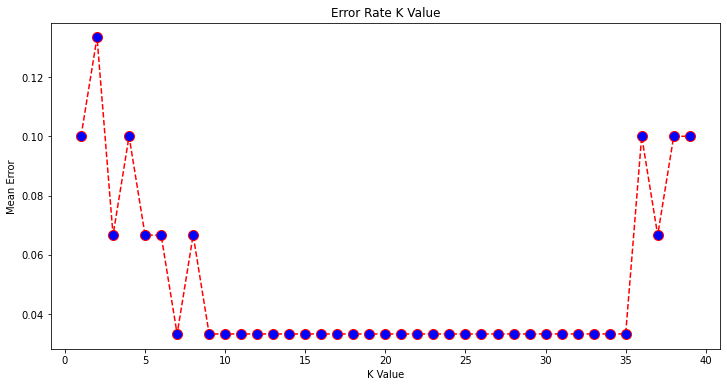

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error') 